In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels.api as sm
#from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

In [2]:
df= pd.read_csv('insurance.csv')

#Ramdom Sampling and reindexing the data
#df=df.sample(frac=0.01, replace=True, random_state=1)

In [3]:
#Checking the missing values in the dataset
df.isna().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df.dropna()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe(include='all')

,index,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,NaN,2,NaN,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,NaN,676,NaN,NaN,1064,364,NaN
mean,668.500000,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,386.391641,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,0.000000,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,334.250000,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,668.500000,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,1002.750000,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [39]:
df.drop('index',axis=1,inplace=True)

[]

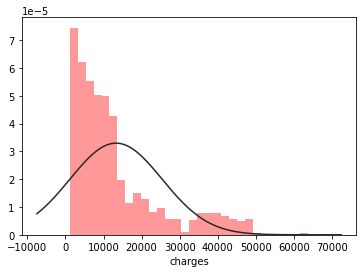

In [24]:
#sns.histplot(df,x='charges')
import scipy as sc          
ax = sns.distplot(df['charges'],fit=sc.stats.norm, kde=False, hist=True, color='r')
ax.plot()

<AxesSubplot:xlabel='sex', ylabel='charges'>

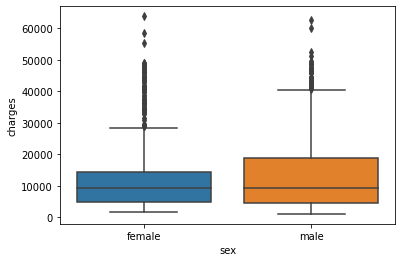

In [26]:

sns.boxplot(x = 'sex', y= 'charges', data= df)

<AxesSubplot:xlabel='region', ylabel='charges'>

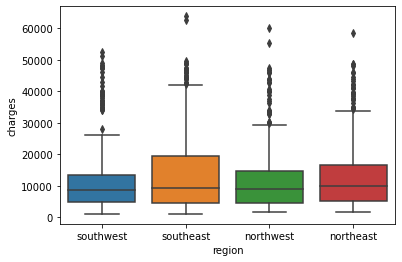

In [27]:

sns.boxplot(x = 'region', y= 'charges', data= df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

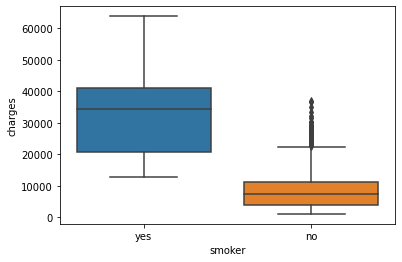

In [28]:
sns.boxplot(x = 'smoker', y= 'charges', data= df)

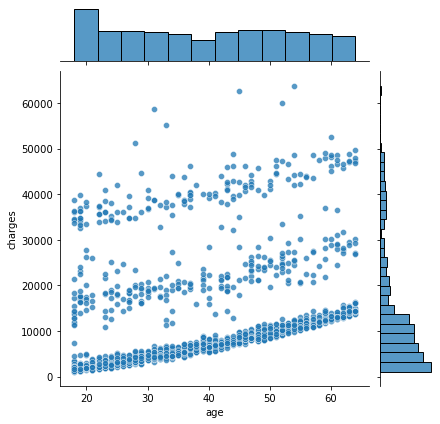

In [32]:
sns.jointplot(x='age', y='charges', data=df, alpha=.75)

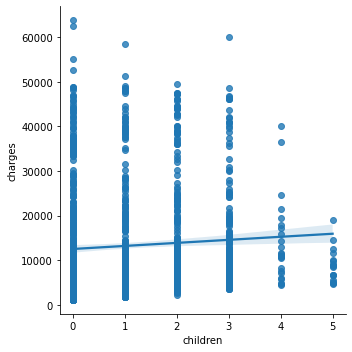

In [36]:
sns.lmplot(x='children', y='charges', data=df)

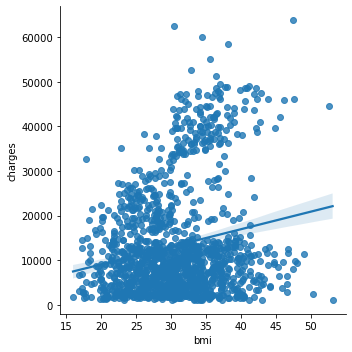

In [37]:
sns.lmplot(x='bmi', y='charges', data=df)

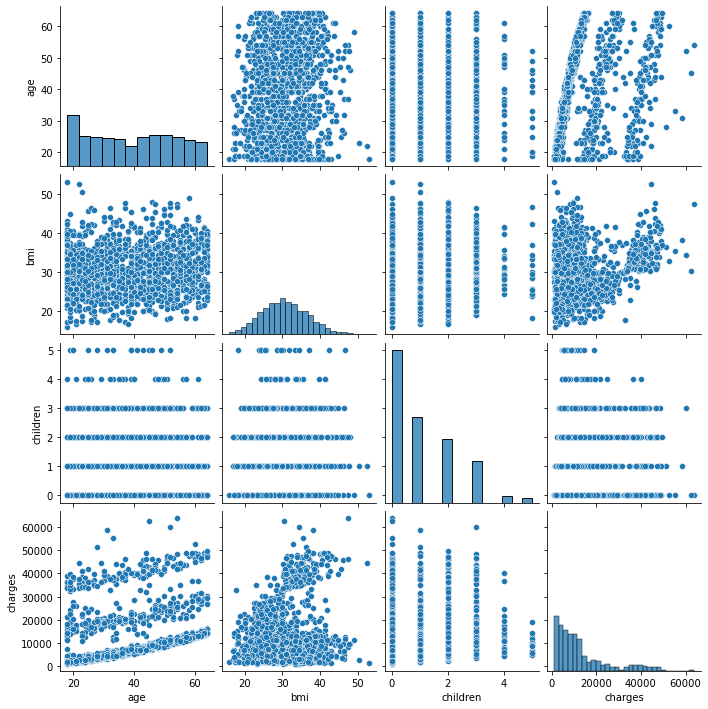

In [40]:
sns.pairplot(df)

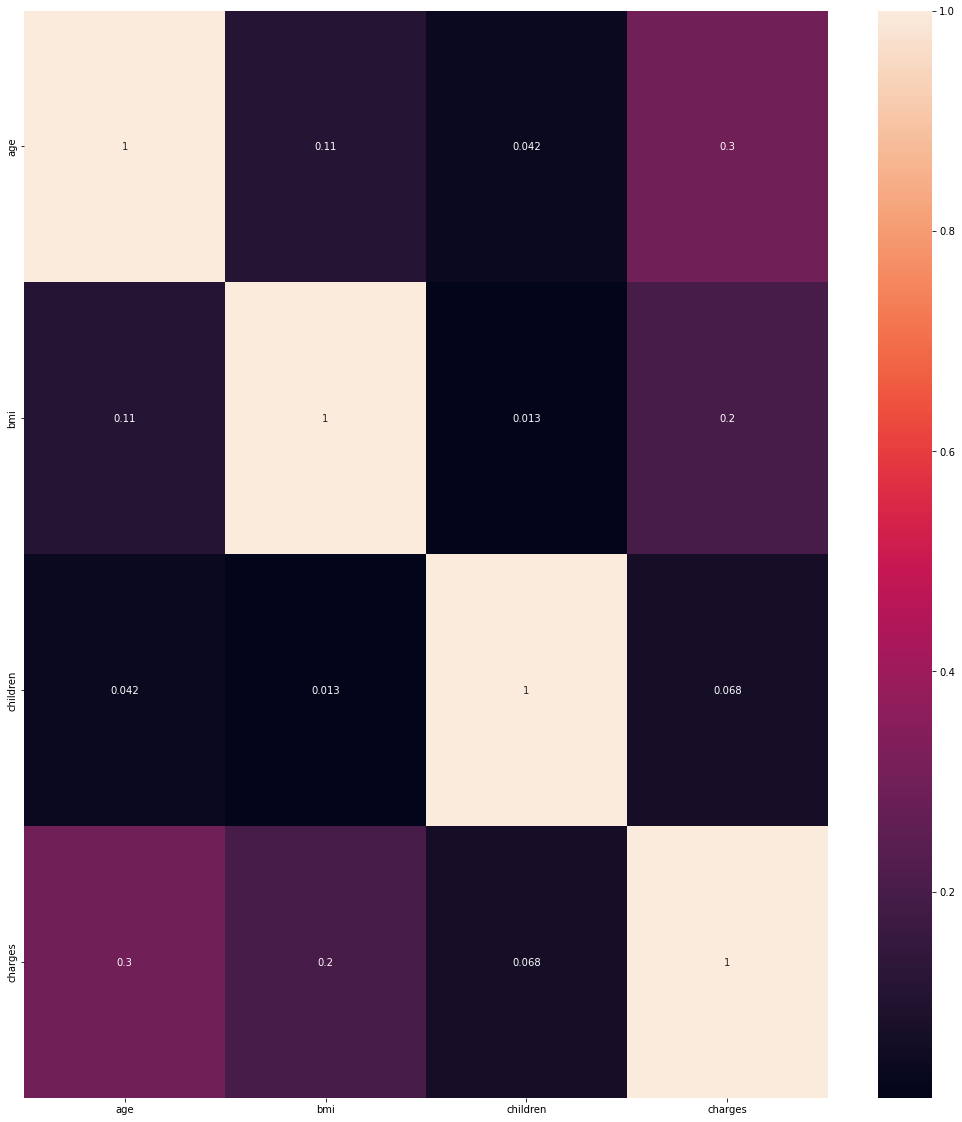

In [41]:
#Heatmap with Correlation Coefficients
plt.figure(figsize = (18,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

Machine learning data pre-processes

In [42]:
#Dummy Coding
df= pd.get_dummies(df
               ,columns = ['sex','region','smoker']
               ,drop_first = True
               )

In [44]:
df = df.dropna()
y_data = df['charges']
x_data = df[[ 'age', 'bmi', 'children', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest', 'smoker_yes']]



print(x_data.shape)
print(y_data.shape)

(1338, 8)
(1338,)


In [48]:
#Ordinary logistic regression

#add constant to predictor variables
x_data = sm.add_constant(x_data)

#fit linear regression model
model = sm.OLS(y_data, x_data).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:59:09   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

In [49]:
#MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_data)
sx_data = scaler.fit_transform(x_data)
mm_df = pd.DataFrame(sx_data, columns=x_data.columns)

In [52]:
y_data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    mm_df,
    y_data,
    test_size=0.2,
    random_state=2022) 

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1070, 9) (1070,)
(268, 9) (268,)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
lm=LinearRegression()
linear_model = lm.fit(x_train, y_train)
linear_prediction = linear_model.predict(x_test)

print(mean_absolute_error(y_test, linear_prediction))
print(mean_squared_error(y_test, linear_prediction))
print(np.sqrt(mean_squared_error(y_test, linear_prediction)))

3787.7950953164386
28179899.28520986
5308.474289775722


In [59]:
lm.coef_

array([    0.        , 11350.72415837, 12375.12141568,  2177.57645677,
        -302.68681023,  -245.86627617,  -966.94620826,  -920.87900917,
       23827.93298817])

Text(0, 0.5, 'Predicted Y')

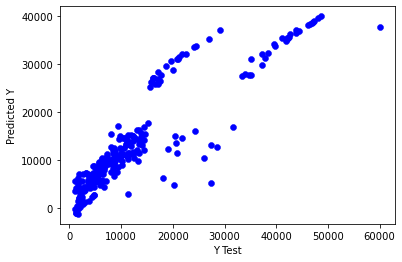

In [60]:
plt.scatter(x=y_test, y=linear_prediction, color="blue", lw=.5)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

In [15]:
# Train the random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
baseline_model = rf.fit(x_train, y_train)
baseline_prediction = baseline_model.predict(x_test)
# Check the model performance
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00        67

    accuracy                           1.00       444
   macro avg       1.00      1.00      1.00       444
weighted avg       1.00      1.00      1.00       444



In [15]:
# Train the random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
baseline_model = rf.fit(x_train, y_train)
baseline_prediction = baseline_model.predict(x_test)
# Check the model performance
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00        67

    accuracy                           1.00       444
   macro avg       1.00      1.00      1.00       444
weighted avg       1.00      1.00      1.00       444



C:\Users\c4uj1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

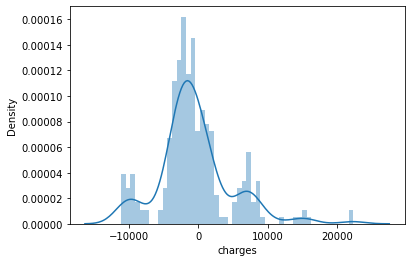

In [61]:
sns.distplot(y_test - linear_prediction, bins=50)

In [66]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, predictions=True)

models, predictions = reg.fit(x_train, x_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:10<00:00,  4.10it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.89,0.89,3990.08,0.06
HistGradientBoostingRegressor,0.86,0.87,4403.09,0.33
LGBMRegressor,0.86,0.86,4418.48,0.07
RandomForestRegressor,0.86,0.86,4442.03,0.21
ExtraTreesRegressor,0.85,0.86,4548.12,0.20
AdaBoostRegressor,0.85,0.85,4635.67,0.03
BaggingRegressor,0.84,0.85,4712.65,0.04
PoissonRegressor,0.84,0.84,4765.03,0.01
KNeighborsRegressor,0.82,0.82,5015.98,0.01
